# 🏡 Linear Regression 3

$$A\bold{x}=\bold{b}$$

Here, 
- $A$ is a 13 x (# of houses) data matrix (13 parameters per house)
- $\bold{b}$ is the price of the hosue
- 🥅 Find a $\bold{\tilde{x}}$ that best predicts the actual housing price
$$\bold{\tilde{x}}=\underbrace{V\Sigma^{-1}U^T}_{A^\dagger}\bold{b}$$


Note: the following code doesn't split the data into testing and training data

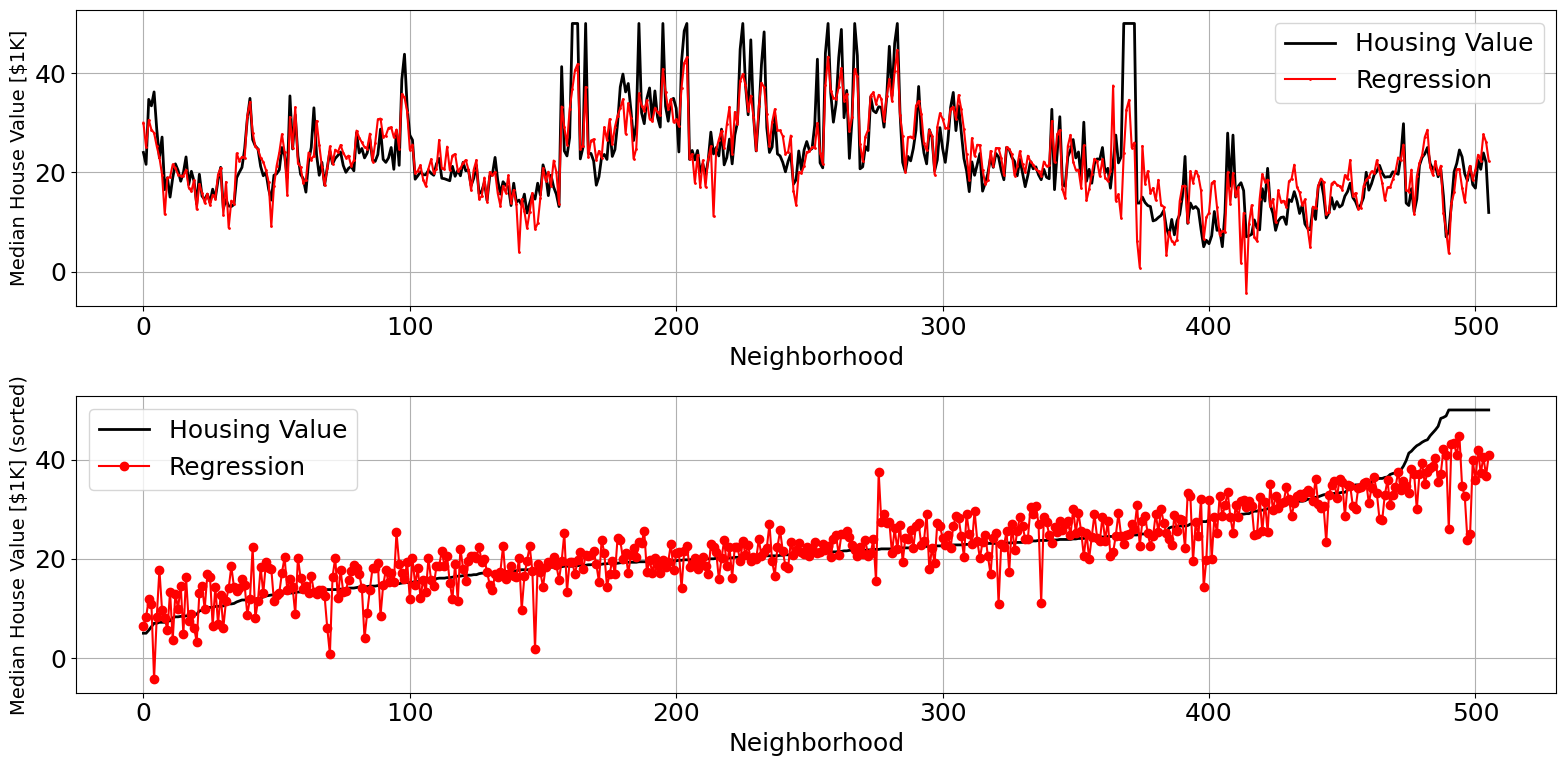

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os 
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
H = np.loadtxt('/workspaces/steve-brunton-book/data/housing.data')
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

# Pad with ones for nonzero offset
A = np.pad(A,[(0, 0),(0, 1)], mode='constant', constant_values=1)

# Solve Ax=b using SVD
# Note that the book uses the Matlab-specifc 'regress' command
U, S, VT = np.linalg.svd(A, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # pseudo-inverse of x

fig = plt.figure()
ax1 = fig.add_subplot(211)

plt.plot(b, color='k', linewidth=2, label='Housing Value')  # True relation
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=1, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median House Value [$1K]', fontsize=14)
plt.legend()
plt.grid()

ax2 = fig.add_subplot(212)
sort_ind = np.argsort(H[:,-1]) 
b = b[sort_ind] # sorted values
plt.plot(b, color='k', linewidth=2, label='Housing Value')  # True relation
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median House Value [$1K] (sorted)', fontsize=14)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

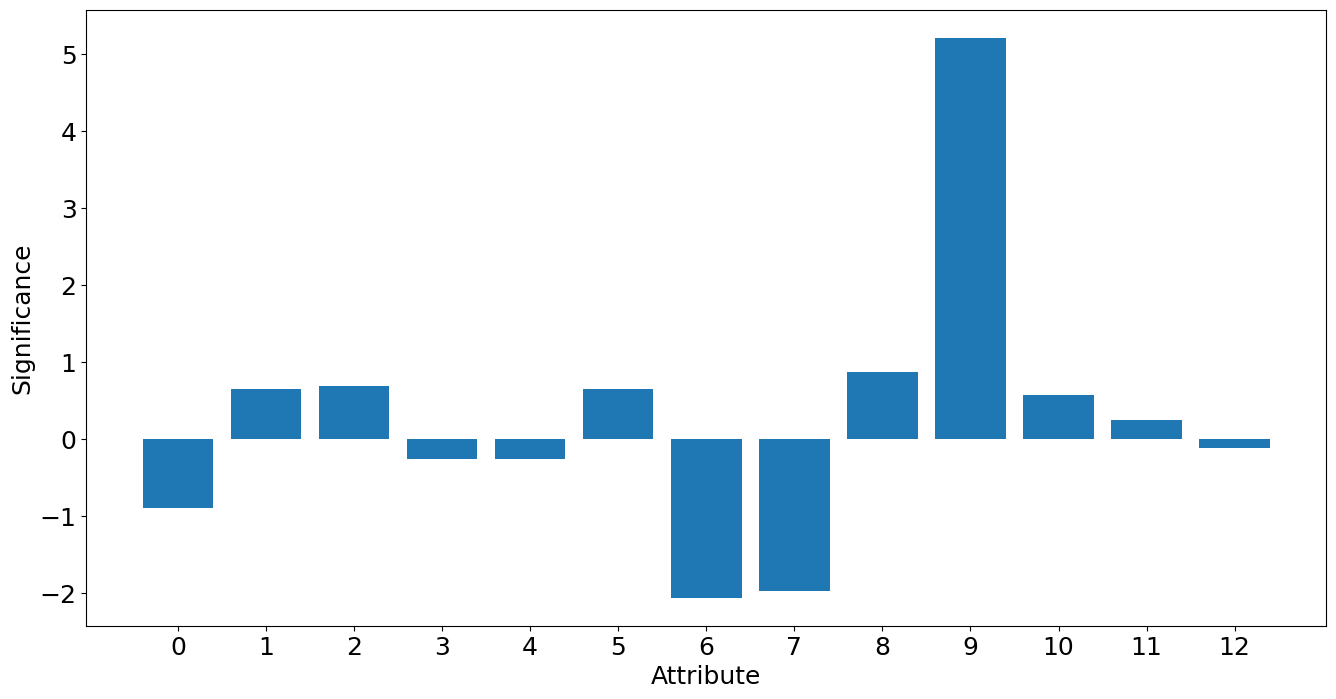

In [21]:
A_mean = np.mean(A, axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std 

A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)*np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()


## 🏡 Split Data into Training vs. Testing

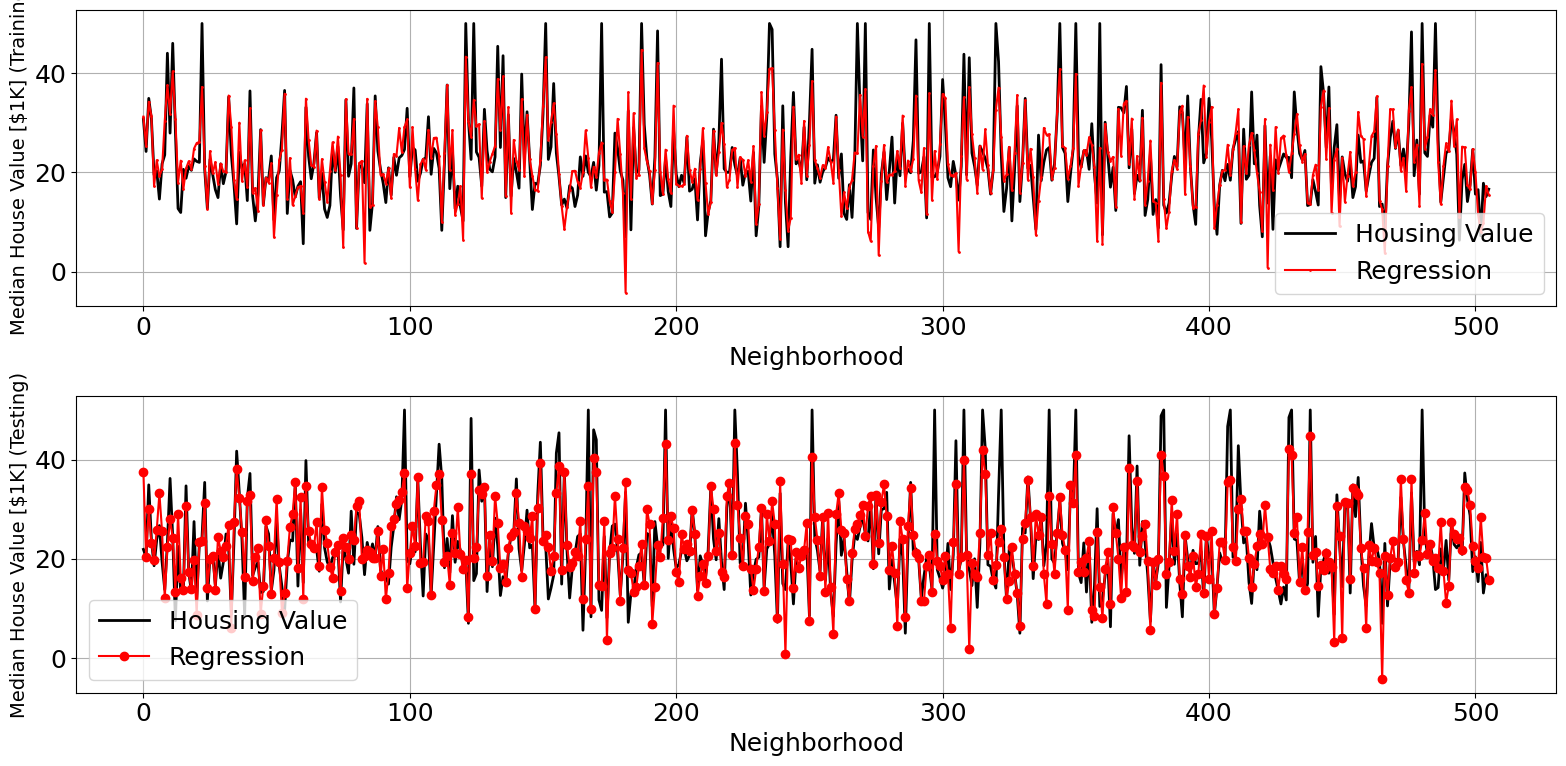

In [24]:
# Load the dataset
H = np.loadtxt('/workspaces/steve-brunton-book/data/housing.data')
b = H[:,-1]     # housing values in $1000s
A = H[:,:-1]    # other factors

# Pad with ones for nonzero offset
A = np.pad(A, [(0,0),(0,1)],mode='constant',constant_values=1)

n = 25;
p = np.random.permutation(506);
A = A[p,:]
b = b[p]
btrain = b[1:n]
Atrain = A[1:n]
btest = b[n:]
Atest = A[n:]

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # pseudo-inverse of x

fig = plt.figure()
ax1 = fig.add_subplot(211)

plt.plot(b, color='k', linewidth=2, label='Housing Value')  # True relation
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=1, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median House Value [$1K] (Training)', fontsize=14)
plt.legend()
plt.grid()

ax2 = fig.add_subplot(212)
sort_ind = np.argsort(H[:,-1]) 
b = b[sort_ind] # sorted values
plt.plot(b, color='k', linewidth=2, label='Housing Value')  # True relation
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median House Value [$1K] (Testing)', fontsize=14)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()
